<a href="https://colab.research.google.com/github/tanya1404/CustomerSegmentation/blob/main/Copy_of_Recipe_Visualization_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
try:

    df = pd.read_csv('/epi_r.csv', delimiter=',', on_bad_lines='skip')
except pd.errors.ParserError:
    df = pd.read_csv('/epi_r.csv', engine='python', delimiter=',', on_bad_lines='skip')
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Task 1: Data Cleaning and Preprocessing**

In [ ]:
df.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20050.000000,1.593400e+04,15889.000000,1.586800e+04,1.593200e+04,20050.000000,20050.000000,20050.000000,20050.000000,20050.000000,...,20050.000000,20050.000000,20050.000000,20050.000000,20050.000000,20050.000000,20050.000000,20050.000000,20050.000000,20050.000000
mean,3.714433,6.323339e+03,100.166845,3.468990e+02,6.226364e+03,0.000299,0.000050,0.000848,0.001347,0.000349,...,0.001247,0.026334,0.000050,0.000299,0.014863,0.000150,0.000349,0.001397,0.000948,0.022743
std,1.340887,3.590573e+05,3840.439305,2.045675e+04,3.333286e+05,0.017297,0.007062,0.029107,0.036673,0.018682,...,0.035290,0.160131,0.007062,0.017297,0.121007,0.012232,0.018682,0.037345,0.030770,0.149087
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


In [ ]:
df.columns.tolist()

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'alaska.1',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'bri

In [ ]:
df.isnull().sum()

,0
title,0
rating,0
calories,4116
protein,4161
fat,4182
...,...
cookbooks,0
leftovers,0
snack,0
snack week,0


In [ ]:
df = df.dropna(axis=1, how='all')
print(df)

                                             title  rating  calories  protein  \
0                  Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0   
1      Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
2                    Potato and Fennel Soup Hodge    3.750     165.0      6.0   
3                 Mahi-Mahi in Tomato Olive Sauce    5.000       NaN      NaN   
4                        Spinach Noodle Casserole    3.125     547.0     20.0   
...                                            ...     ...       ...      ...   
20045                              Parmesan Puffs    3.125      28.0      2.0   
20046              Artichoke and Parmesan Risotto    4.375     671.0     22.0   
20047                       Turkey Cream Puff Pie    4.375     563.0     31.0   
20048     Snapper on Angel Hair with Citrus Cream    4.375     631.0     45.0   
20049  Baked Ham with Marmalade-Horseradish Glaze    4.375     560.0     73.0   

        fat  sodium  #cakew

In [ ]:
df.nunique()

,0
title,17734
rating,8
calories,1858
protein,282
fat,326
...,...
cookbooks,2
leftovers,2
snack,2
snack week,2


In [ ]:
columns_to_drop = ['alabama', 'alaska', 'amaretto', 'anchovy','anthony bourdain','aperitif','candy thermometer', 'artichoke','argula', 'asian pear','aspen', 'bass', 'bastille day', 'bok choy','horseradish','braise','brie', 'broil','cantaloupe', 'capers', 'caraway', 'chartreuse', 'chilli', 'condiment', 'connecticut', 'couscous', 'creeme de cacoa', 'dallas', 'eau de vie','emeril', 'epi+ ushg','' 'escarole', 'frittata','gouda', 'harpercollins', 'healdsburg', 'hominy/ cornmeal/masa','honeydew',]  # Replace with the actual column names you want to drop
# Remove leading/trailing spaces and ensure proper capitalization in column names
columns_to_drop = [col.strip() for col in columns_to_drop]

# Drop only columns that exist in the DataFrame
existing_columns = df.columns
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

# Drop specified columns
df = df.drop(columns=columns_to_drop)
print("\nCleaned DataFrame:")
print(df)


Cleaned DataFrame:
                                             title  rating  calories  protein  \
0                  Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0   
1      Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
2                    Potato and Fennel Soup Hodge    3.750     165.0      6.0   
3                 Mahi-Mahi in Tomato Olive Sauce    5.000       NaN      NaN   
4                        Spinach Noodle Casserole    3.125     547.0     20.0   
...                                            ...     ...       ...      ...   
20045                              Parmesan Puffs    3.125      28.0      2.0   
20046              Artichoke and Parmesan Risotto    4.375     671.0     22.0   
20047                       Turkey Cream Puff Pie    4.375     563.0     31.0   
20048     Snapper on Angel Hair with Citrus Cream    4.375     631.0     45.0   
20049  Baked Ham with Marmalade-Horseradish Glaze    4.375     560.0     73.0   

       

**Task 2 : Exploratory Data Analysis(EDA)**

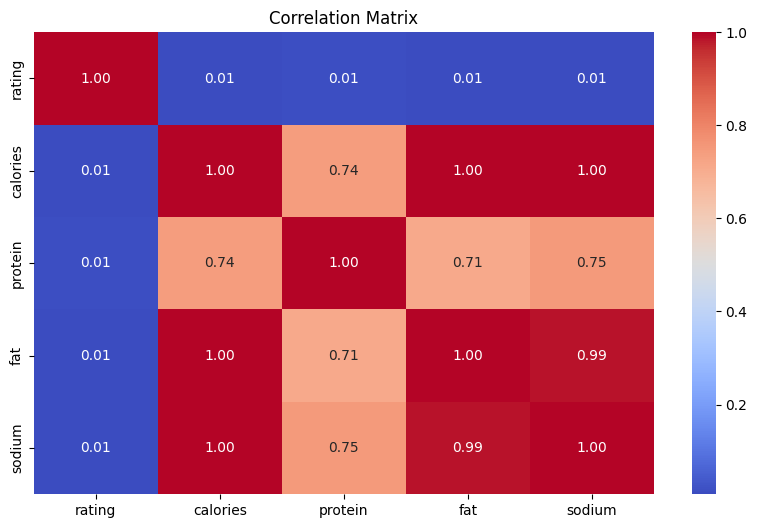

In [ ]:
plt.figure(figsize=(10, 6))
correlation = df[['rating', 'calories', 'protein', 'fat', 'sodium']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
high_rating_threshold = 4

high_rated_recipes = df[df['rating'] >= high_rating_threshold]

ingredient_columns = [
    'avocado', 'chocolate', 'spinach', 'yellow squash', 'wine', 'white wine',
    'whiskey', 'vodka', 'tea', 'sparkling wine', 'scotch', 'red wine',
    'orange juice', 'martini', 'margarita', 'liqueur', 'lime juice',
    'lemon juice', 'iced coffee', 'hot drink', 'fruit juice', 'drink',
    'cocktail', 'champagne', 'buttermilk' ]

ingredient_counts = {ingredient: 0 for ingredient in ingredient_columns}

for ingredient in ingredient_columns:

    if ingredient in high_rated_recipes.columns:

        ingredient_counts[ingredient] = high_rated_recipes[ingredient].fillna(0).astype(bool).sum()
    else:
        print(f"Warning: Ingredient '{ingredient}' not found in the DataFrame.")

ingredient_counts_df = pd.DataFrame(list(ingredient_counts.items()), columns=['Ingredient', 'Count'])
ingredient_counts_df = ingredient_counts_df.sort_values(by='Count', ascending=False)

print("Most Frequent Ingredients in High-Rated Recipes:")
print(ingredient_counts_df)

Most Frequent Ingredients in High-Rated Recipes:
        Ingredient  Count
1        chocolate    481
21           drink    394
5       white wine    280
20     fruit juice    241
2          spinach    196
11        red wine    181
0          avocado    150
22        cocktail    141
15         liqueur    129
4             wine    110
17     lemon juice     78
7            vodka     68
16      lime juice     56
23       champagne     51
8              tea     44
24      buttermilk     38
12    orange juice     26
9   sparkling wine     25
6          whiskey     25
19       hot drink     20
14       margarita     12
3    yellow squash     10
13         martini      4
18     iced coffee      1
10          scotch      1


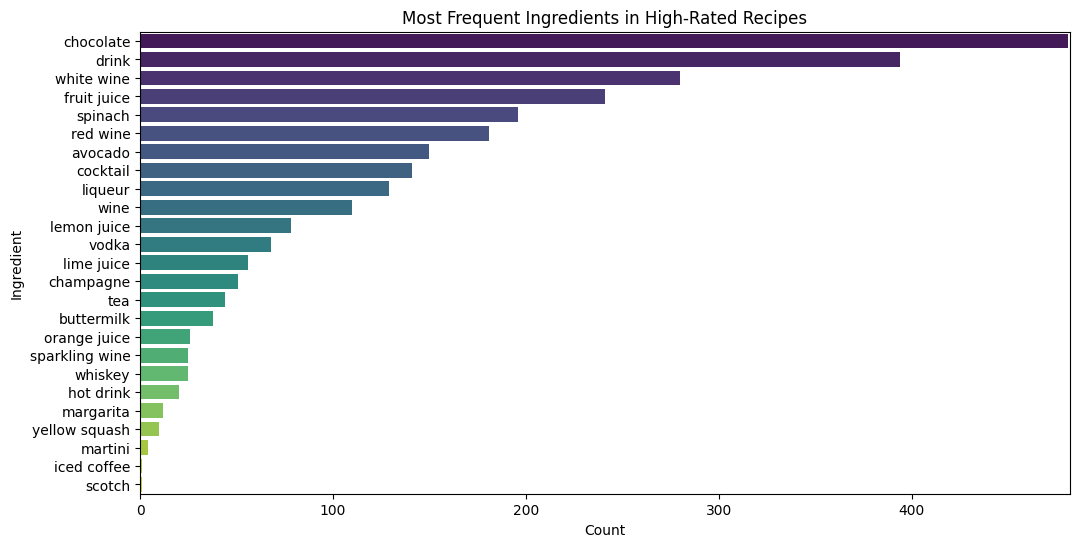

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Ingredient', data=ingredient_counts_df, palette='viridis')
plt.title('Most Frequent Ingredients in High-Rated Recipes')
plt.xlabel('Count')
plt.ylabel('Ingredient')
plt.xlim(0, ingredient_counts_df['Count'].max() + 1)
plt.show()

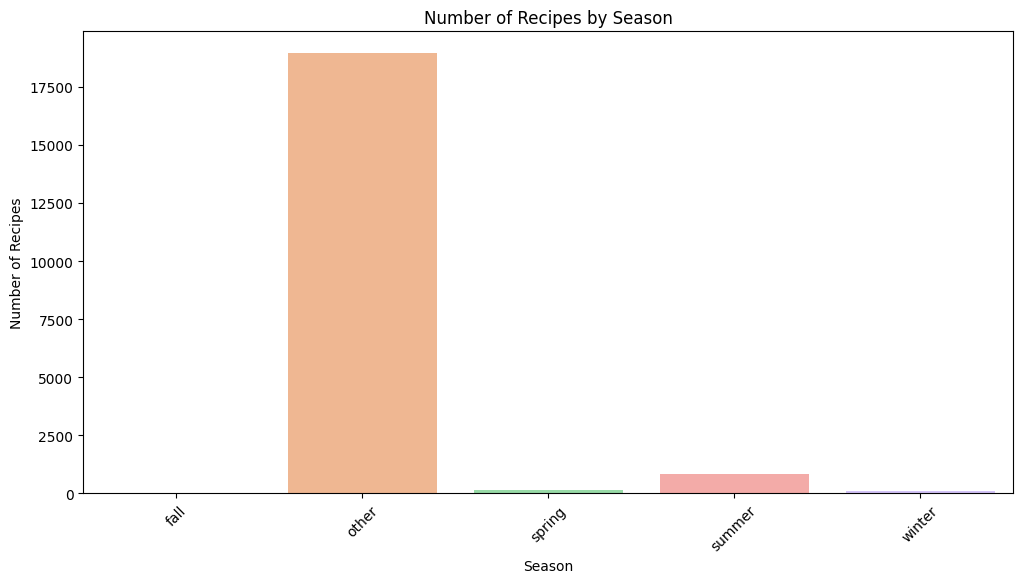

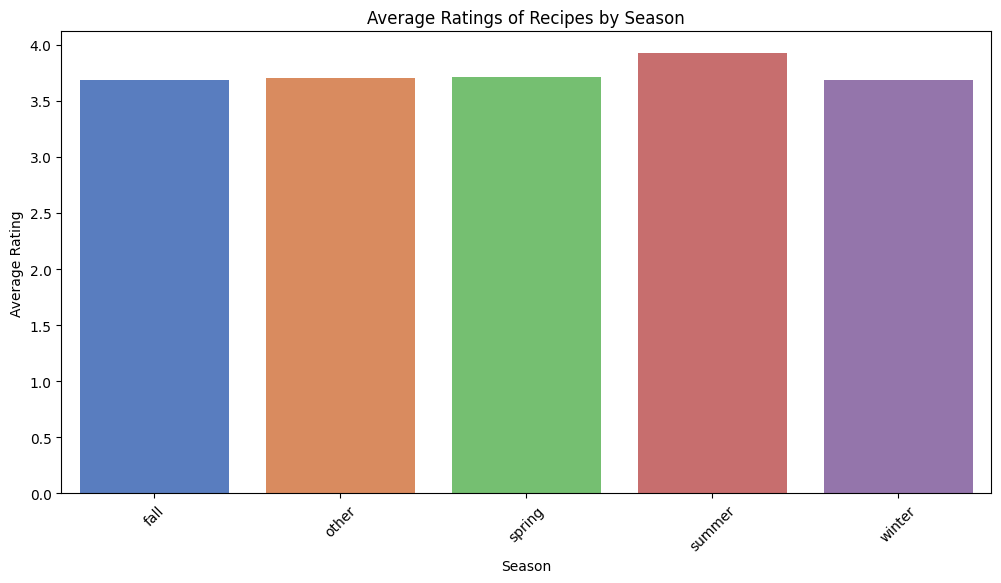

In [ ]:
seasonal_keywords = {
    'winter': ['winter', 'holiday', 'new year', 'christmas', 'thanksgiving'],
    'spring': ['spring', 'easter', 'passover', 'garden'],
    'summer': ['summer', 'grill', 'BBQ', 'picnic'],
    'fall': ['fall', 'harvest', 'thanksgiving', 'halloween']
}

# Function to categorize recipes by season based on keywords in the title
def categorize_season(row):
    title = row['title'].lower()
    for season, keywords in seasonal_keywords.items():
        if any(keyword in title for keyword in keywords):
            return season
    return 'other'  # For recipes that don't fall into any season

# Apply the function to create a new 'season' column
df['season'] = df.apply(categorize_season, axis=1)

# Group by season and calculate average ratings
seasonal_analysis = df.groupby('season').agg({
    'rating': 'mean',
    'title': 'count'  # Count of recipes in each season
}).reset_index()

# Rename columns for clarity
seasonal_analysis.columns = ['Season', 'Average Rating', 'Recipe Count']

# Plotting the data
plt.figure(figsize=(12, 6))
sns.barplot(data=seasonal_analysis, x='Season', y='Recipe Count', palette='pastel')
plt.title('Number of Recipes by Season')
plt.ylabel('Number of Recipes')
plt.xlabel('Season')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=seasonal_analysis, x='Season', y='Average Rating', palette='muted')
plt.title('Average Ratings of Recipes by Season')
plt.ylabel('Average Rating')
plt.xlabel('Season')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['22-minute meals'] = df['22-minute meals'].astype(bool)
df['3-ingredient recipes'] = df['3-ingredient recipes'].astype(bool)

df_clean = df.dropna(subset=['rating'])
avg_ratings = df_clean.groupby(['22-minute meals', '3-ingredient recipes'])['rating'].mean().reset_index()
print(avg_ratings)

   22-minute meals  3-ingredient recipes    rating
0            False                 False  3.716354
1            False                  True  1.967593
2             True                 False  4.227941


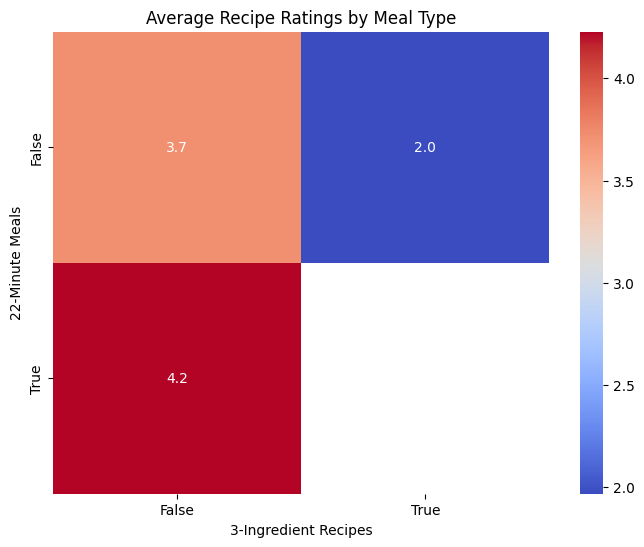

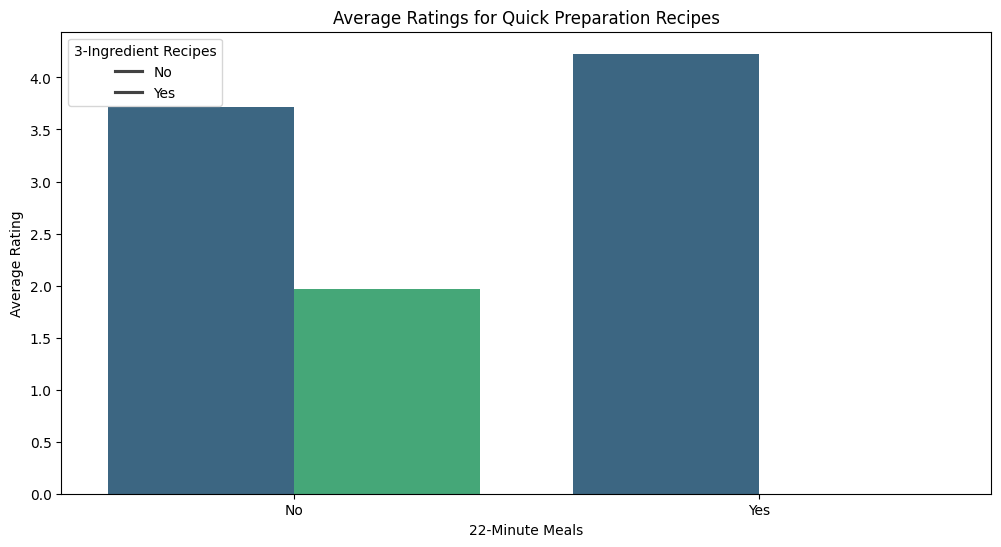

In [ ]:
pivot_table = avg_ratings.pivot(index= '22-minute meals',columns = '3-ingredient recipes',values= 'rating')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Average Recipe Ratings by Meal Type')
plt.xlabel('3-Ingredient Recipes')
plt.ylabel('22-Minute Meals')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_ratings, x='22-minute meals', y='rating', hue='3-ingredient recipes', palette='viridis')
plt.title('Average Ratings for Quick Preparation Recipes')
plt.xlabel('22-Minute Meals')
plt.ylabel('Average Rating')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='3-Ingredient Recipes', loc='upper left', labels=['No', 'Yes'])
plt.show()


In [ ]:
alcoholic_ingredients = ['beer', 'whiskey', 'vodka', 'wine', 'cocktail', 'brandy', 'champagne', 'liqueur', 'rum', 'gin', 'sake', 'tequila', 'martini', 'bourbon', 'scotch']
non_alcoholic_ingredients = ['apple juice', 'orange juice', 'lemonade', 'fruit punch', 'iced tea', 'hot drink']

def classify_drink(row):

    for ingredient in alcoholic_ingredients:
        if ingredient in row['title'].lower():
            return 'Alcoholic'
    for ingredient in non_alcoholic_ingredients:
        if ingredient in row['title'].lower():
            return 'Non-Alcoholic'
    return 'Unknown'

df['drink_type'] = df.apply(classify_drink, axis=1)

alcoholic_df = df[df['drink_type'] == 'Alcoholic']
non_alcoholic_df = df[df['drink_type'] == 'Non-Alcoholic']
print("Alcoholic Recipes:")
print(alcoholic_df[['title', 'rating']])

print("\nNon-Alcoholic Recipes:")
print(non_alcoholic_df[['title', 'rating']])

Alcoholic Recipes:
                                                   title  rating
11               Beef Tenderloin with Garlic and Brandy    4.375
23                               Garlic Baguette Crumbs    0.000
82             Braised Brisket with Bourbon-Peach Glaze    4.375
109                         Honey-Ginger Barbecue Sauce    4.375
114                                  Tropical Rum Punch    5.000
...                                                  ...     ...
19927  Braised Chicken with Smoked Ham, Chestnuts, an...   4.375
19936                                     Scotch Cooler    0.000
19959       Shrimp with Garlic and Toasted Bread Crumbs    4.375
20025  Grilled Fillet of Beef with Tomato Ginger Vina...   4.375
20039                 Chicken with White Wine and Herbs    2.500

[1442 rows x 2 columns]

Non-Alcoholic Recipes:
                                                   title  rating
1333                            Cold Brew Plum Iced Tea    5.000
1881           Roasted

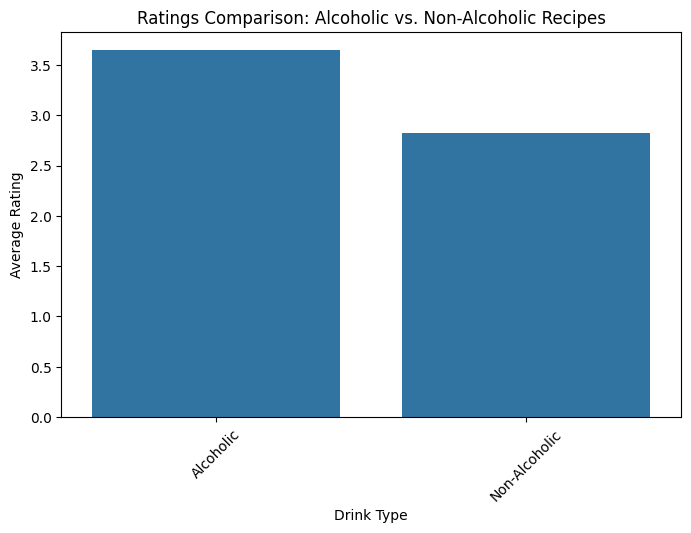

In [ ]:
ratings = {
    'Category': ['Alcoholic'] * len(alcoholic_df) + ['Non-Alcoholic'] * len(non_alcoholic_df),
    'Rating': list(alcoholic_df['rating']) + list(non_alcoholic_df['rating'])
}
ratings_df = pd.DataFrame(ratings)

# Plot the ratings comparison
plt.figure(figsize=(8, 5))
sns.barplot(data=ratings_df, x='Category', y='Rating', ci=None)
plt.title('Ratings Comparison: Alcoholic vs. Non-Alcoholic Recipes')
plt.ylabel('Average Rating')
plt.xlabel('Drink Type')
plt.xticks(rotation=45)
plt.show()

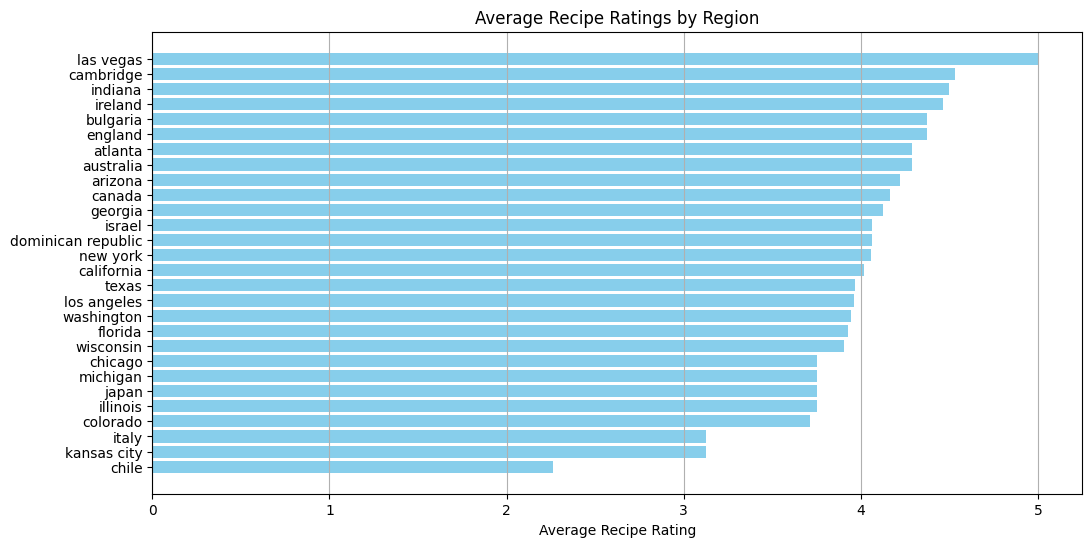

In [ ]:
regions = [ 'australia', 'arizona','atlanta', 'los angeles','bulgaria','cambridge','canada','chicago','chile','colorado','dominican republic','england','california', 'colorado', 'florida', 'indiana', 'ireland',
           'israel','italy','japan','kansas city', 'las vegas',
           'georgia', 'illinois', 'indiana', 'michigan', 'new york', 'texas',
           'washington', 'wisconsin']

region_ratings = pd.DataFrame()

for region in regions:
    region_ratings[region] = df[region] * df['rating']

recipe_counts = df[regions].sum(axis=0)
average_ratings = region_ratings.sum(axis=0) / recipe_counts

average_ratings_df = average_ratings.reset_index()
average_ratings_df.columns = ['Region', 'Average Rating']

average_ratings_df = average_ratings_df.sort_values(by='Average Rating', ascending=True)
plt.figure(figsize=(12, 6))
plt.barh(average_ratings_df['Region'], average_ratings_df['Average Rating'], color='skyblue')
plt.xlabel('Average Recipe Rating')
plt.title('Average Recipe Ratings by Region')
plt.grid(axis='x')
plt.show()

In [ ]:
occasion_columns = ['birthday', 'wedding', 'thanksgiving', 'christmas', 'graduation', 'valentine\'s day', 'easter', 'lunar new year','labor day','halloween', 'mother\'s day',
'persian new year']

occasion_counts = pd.DataFrame()
for occasion in occasion_columns:
    occasion_counts[occasion] = df[occasion].apply(lambda x: 1 if x else 0).groupby(df[occasion].notnull()).sum()

occasion_counts_summary = occasion_counts.sum().reset_index()
occasion_counts_summary.columns = ['Occasion', 'Recipe Count']

occasion_counts_summary = occasion_counts_summary.sort_values(by='Recipe Count', ascending=False)

print(occasion_counts_summary)



            Occasion  Recipe Count
2       thanksgiving          1457
3          christmas          1039
6             easter           234
5    valentine's day           233
0           birthday           193
10      mother's day           165
1            wedding           112
4         graduation            89
7     lunar new year            46
9          halloween            42
8          labor day             9
11  persian new year             4


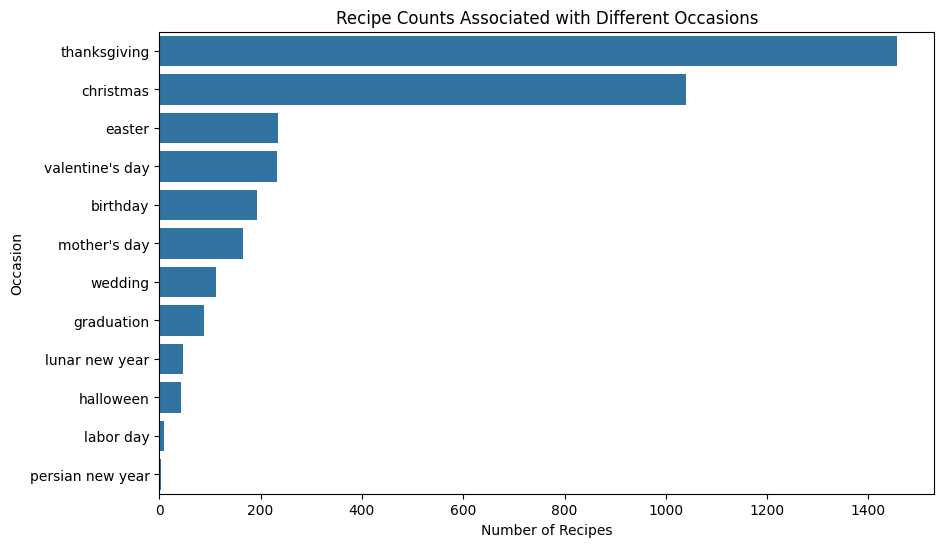

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Recipe Count', y='Occasion', data=occasion_counts_summary)
plt.title('Recipe Counts Associated with Different Occasions')
plt.xlabel('Number of Recipes')
plt.ylabel('Occasion')
plt.show()

In [ ]:
health_conscious_ingredients = ['quinoa','walnut', 'vinegar','wheat/gluten-free','yogurt','high fiber','herb','hazelnut','brown rice']

df['contains_health_ingredient'] = df[health_conscious_ingredients].any(axis=1)

ingredient_ratings = df.groupby('contains_health_ingredient')['rating'].mean().reset_index()

ingredient_ratings.columns = ['Contains Health Ingredient', 'Average Rating']
print(ingredient_ratings)


   Contains Health Ingredient  Average Rating
0                       False        3.654685
1                        True        3.806207


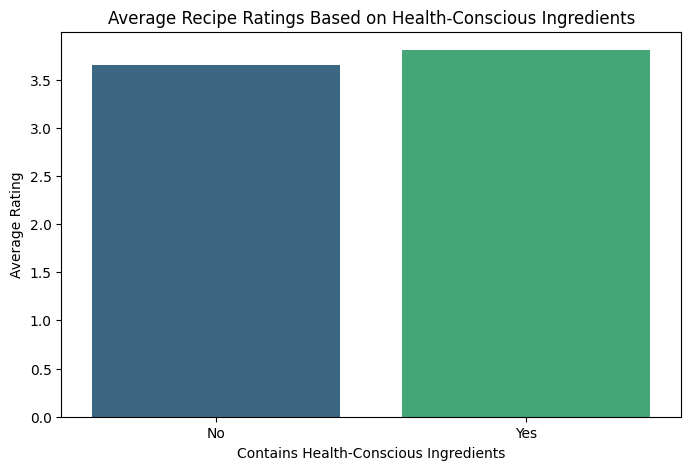

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=ingredient_ratings, x='Contains Health Ingredient', y='Average Rating', palette='viridis')
plt.title('Average Recipe Ratings Based on Health-Conscious Ingredients')
plt.xlabel('Contains Health-Conscious Ingredients')
plt.ylabel('Average Rating')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()




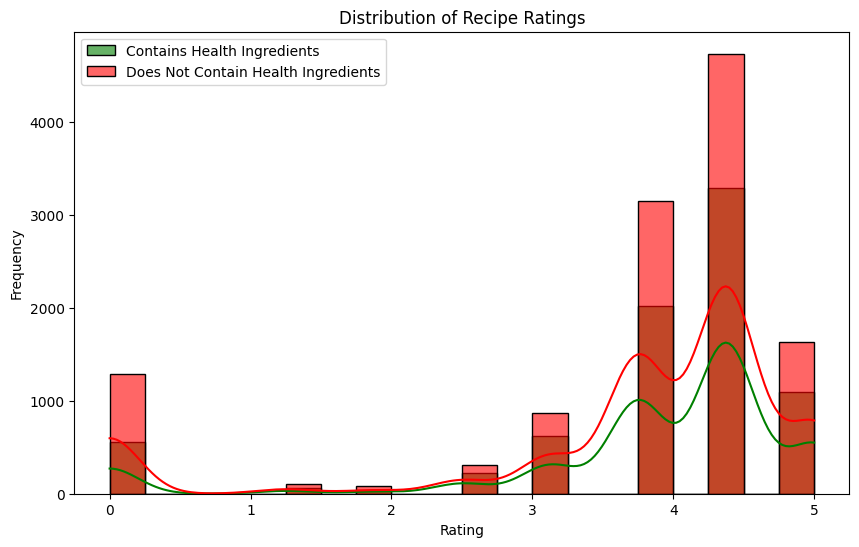

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['contains_health_ingredient']]['rating'], bins=20, color='green', alpha=0.6, label='Contains Health Ingredients', kde=True)
sns.histplot(df[~df['contains_health_ingredient']]['rating'], bins=20, color='red', alpha=0.6, label='Does Not Contain Health Ingredients', kde=True)
plt.title('Distribution of Recipe Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()